In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('C:\\Users\\shaho\\DS_complex_assig_dataset\\marketing_campaign.csv',  sep = "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [11]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [14]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [15]:
df['Income'].value_counts()

7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: Income, Length: 1974, dtype: int64

In [16]:
df.drop(df.loc[df['Marital_Status']=='Absurd'].index, inplace=True)
df.drop(df.loc[df['Marital_Status']=='YOLO'].index, inplace=True)
df.drop(df.loc[df['Marital_Status']=='Alone'].index, inplace=True)

In [17]:
df['Total_Product_Purchase'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']
df['Year'] = df['Dt_Customer'].dt.year

In [18]:
total_yearly_purchase = pd.DataFrame(df.groupby('Year')['Total_Product_Purchase'].sum())
total_yearly_purchase

,Total_Product_Purchase
Year,
2012,363769
2013,705725
2014,271782


In [19]:
customer_purchase = pd.DataFrame(df.groupby('Dt_Customer')['Total_Product_Purchase'].sum())
customer_purchase

,Total_Product_Purchase
Dt_Customer,
2012-01-08,3609
2012-01-09,1078
2012-01-10,4968
2012-01-11,1322
2012-01-12,3334
...,...
2014-12-02,4638
2014-12-03,2942
2014-12-04,124


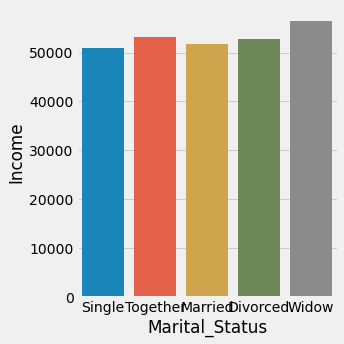

In [23]:
sns.catplot(x='Marital_Status', y='Income', data=df, ci=None, kind = 'bar')
plt.show()

In [21]:
df["Age"] = 2021-df["Year_Birth"]

#Total spendings on various items
df["Spent"] = df["Wines"]+ df["Fruits"]+ df["Meat"]+ df["Fish"]+ df["Sweets"]+ df["Gold"]

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

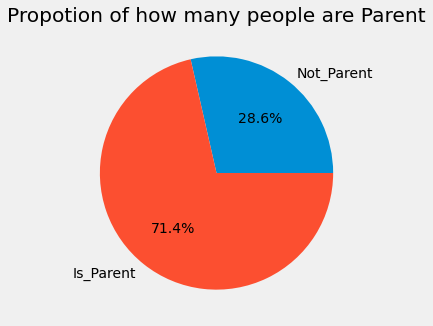

In [24]:
x = df['Is_Parent'].value_counts().sort_values()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=['Not_Parent', 'Is_Parent'], autopct = "%1.1f%%")
plt.title('Propotion of how many people are Parent')
plt.style.use(['fivethirtyeight'])
plt.show()

<AxesSubplot:>

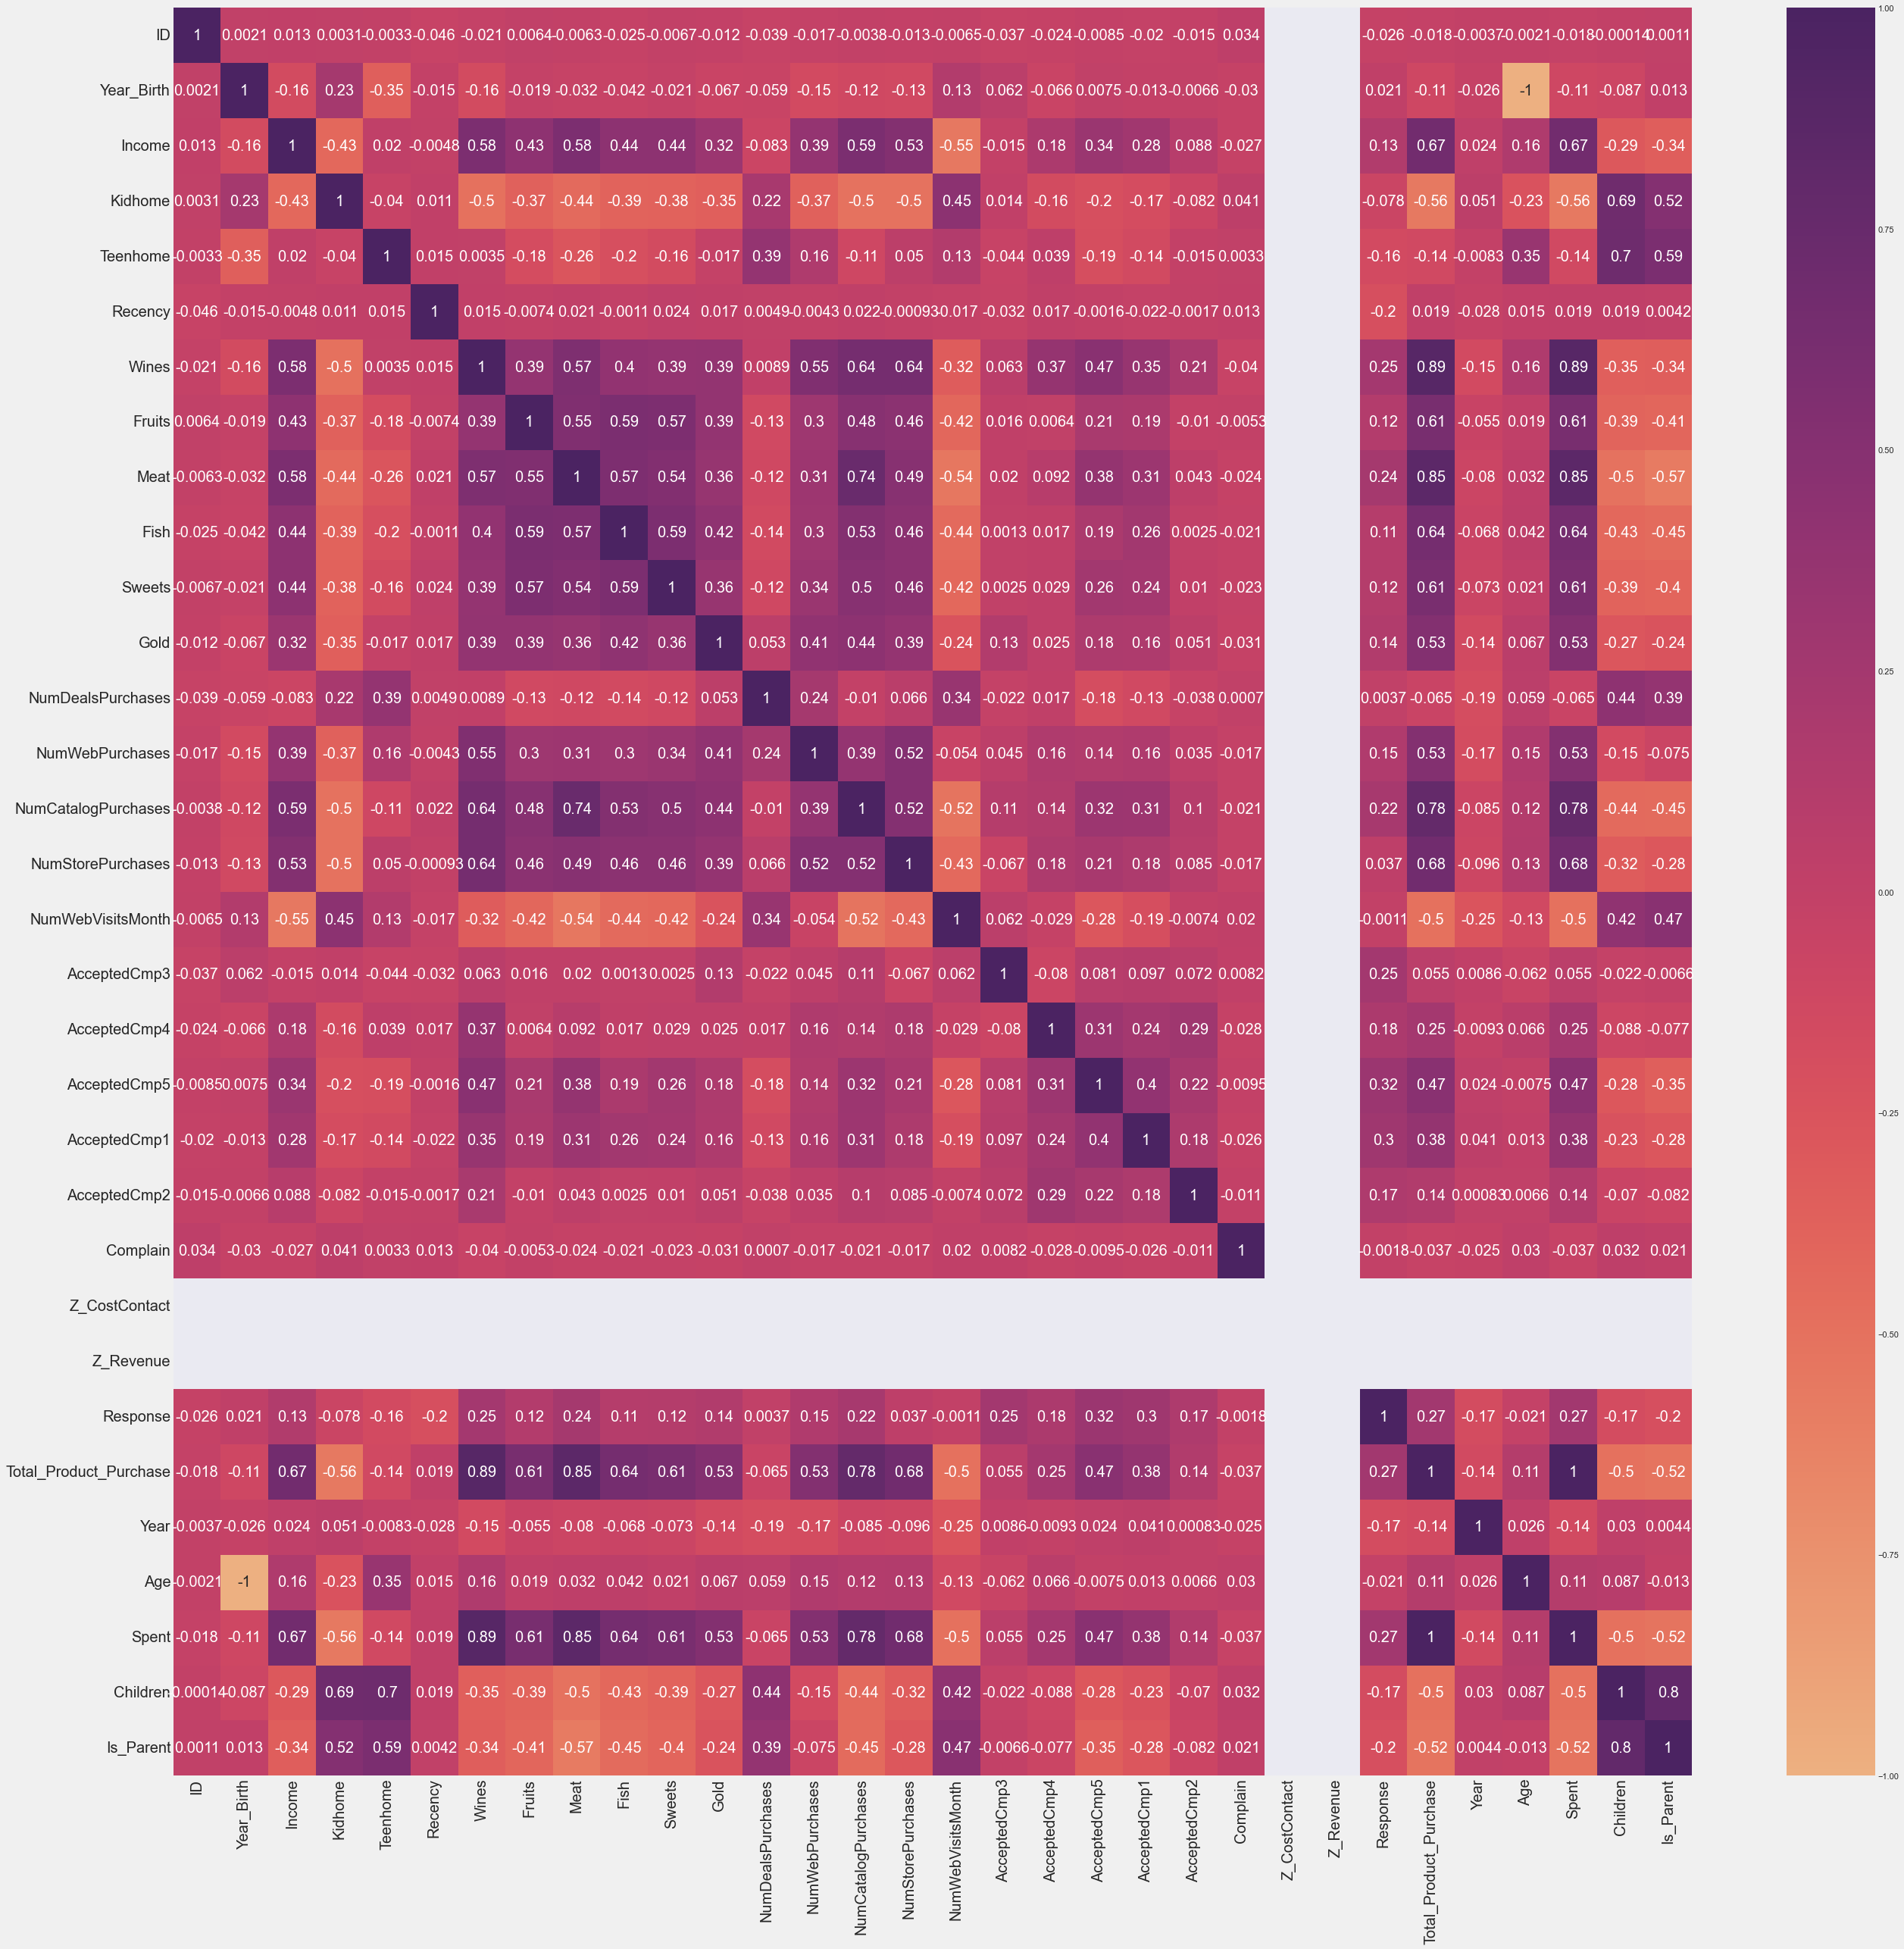

In [187]:
plt.figure(figsize=(40,40))
#cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.set_style('darkgrid')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(df.corr() ,annot=True, cmap=sns.color_palette("flare", as_cmap=True), annot_kws={"size": 20})

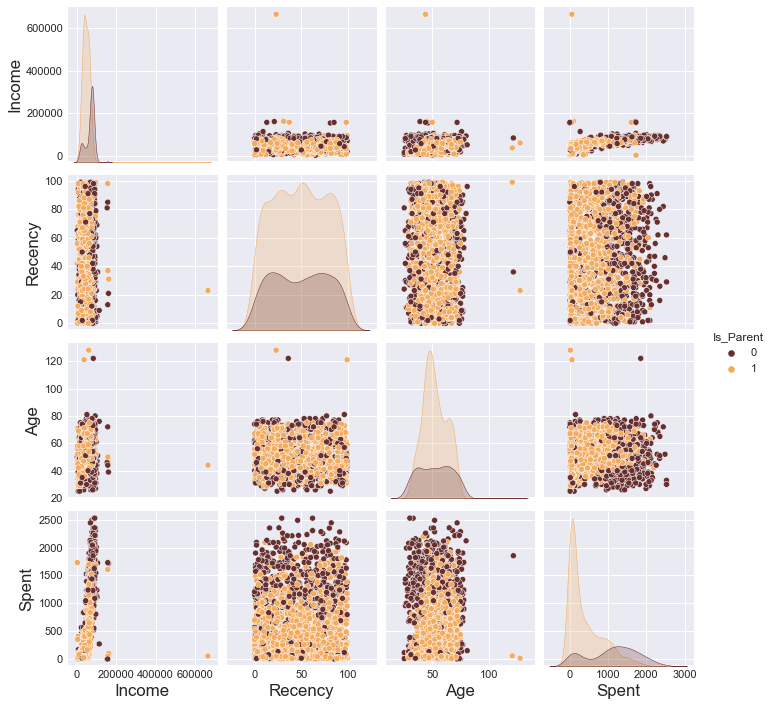

In [188]:
To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))

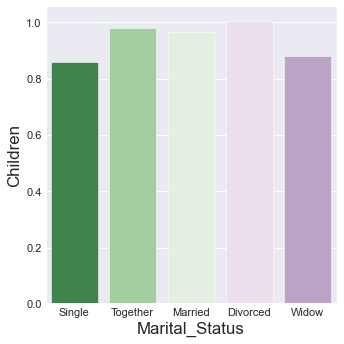

In [189]:
sns.set_palette("PRGn_r")
sns.catplot(x = "Marital_Status", y = "Children", data = df, kind= "bar", ci = None)
plt.show()

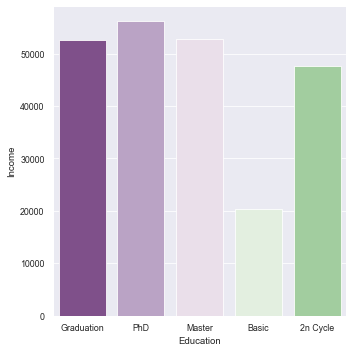

In [190]:
sns.set_style("darkgrid")
sns.set_palette("PRGn")
sns.set_context("paper")
sns.catplot(x = "Education", y = "Income", data = df, kind = "bar", ci = None)
plt.show()

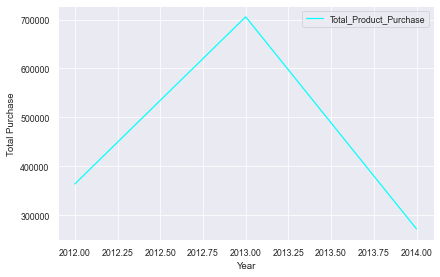

In [191]:
total_yearly_purchase.plot(ylabel = "Total Purchase",color = 'aqua')
plt.show()

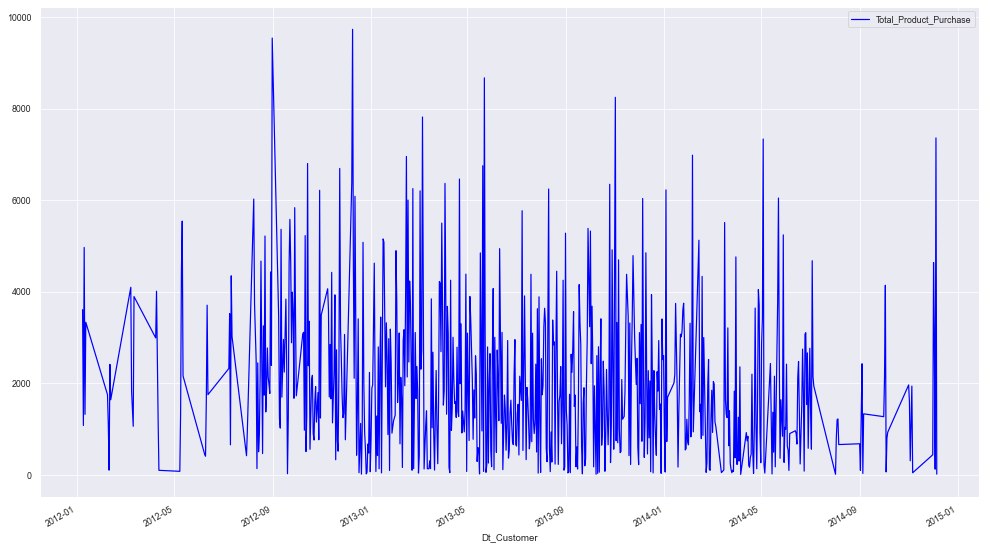

In [192]:
customer_purchase.plot(figsize= (15,10), colormap = "winter")
plt.show()

In [193]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [194]:
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [195]:
#Creating a copy of data
dfCopy = df.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
# Also deleting Marital Status column along with date columns(because of a Data Type issue),
# as well as "Z_CostContact" & "Z_Revenue"
DeletedColumns = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID",'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
dfCopy = dfCopy.drop(DeletedColumns, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(dfCopy)
scaled_df = pd.DataFrame(scaler.transform(dfCopy),columns= dfCopy.columns )
print("All features are now scaled")

All features are now scaled


In [196]:
#This dataset will be used  for futher modelling and clustering.
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Product_Purchase,Year,Age,Spent,Children,Is_Parent
0,-0.348413,0.233957,-0.822923,-0.928356,0.308343,0.976878,1.549217,1.688337,2.463618,1.482224,...,1.430818,2.505919,-0.553997,0.693659,1.674042,-1.502442,0.985586,1.674042,-1.264628,-1.581389
1,-0.348413,-0.234193,1.039614,0.909223,-0.382703,-0.871397,-0.637200,-0.718232,-0.651565,-0.634359,...,-1.125478,-0.571300,-1.168653,-0.131485,-0.961819,1.419120,1.236045,-0.961819,1.406082,0.632355
2,-0.348413,0.768833,-0.822923,-0.928356,-0.797331,0.357824,0.569099,-0.178983,1.345817,-0.147788,...,1.430818,-0.229387,1.289970,-0.544057,0.279854,-0.041661,0.317694,0.279854,-1.264628,-1.581389
3,-0.348413,-1.016084,1.039614,-0.928356,-0.797331,-0.871397,-0.561806,-0.655840,-0.504968,-0.585702,...,-0.760293,-0.913213,-0.553997,0.281087,-0.918717,1.419120,-1.268548,-0.918717,0.070727,0.632355
4,1.431111,0.240109,1.039614,-0.928356,1.552226,-0.391556,0.418311,-0.219092,0.154718,-0.001817,...,0.335263,0.112526,0.060659,-0.131485,-0.306998,1.419120,-1.018089,-0.306998,0.070727,0.632355


In [197]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe()


,col1,col2,col3
count,2.209000e+03,2.209000e+03,2.209000e+03
mean,-9.509017e-17,1.255472e-16,5.970778e-17
std,2.938234e+00,1.622569e+00,1.236672e+00
min,-5.492321e+00,-3.773695e+00,-4.146616e+00
25%,-2.681335e+00,-1.317597e+00,-8.418127e-01
50%,-8.499919e-01,-1.794952e-01,1.117848e-02
75%,2.467963e+00,1.224505e+00,7.728877e-01
max,8.031376e+00,5.776450e+00,5.223075e+00


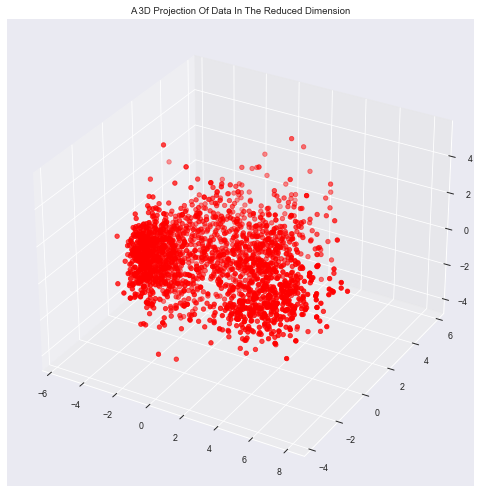

In [198]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="red", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [199]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(PCA_ds)
y_kmeans = kmeans.predict(PCA_ds)

In [200]:
PCA_ds["Clusters"] = y_kmeans
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= y_kmeans

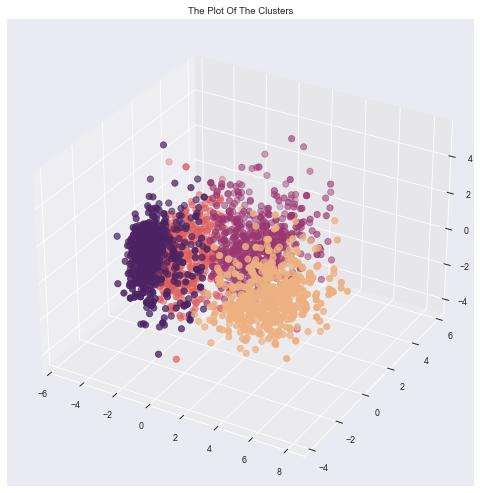

In [201]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], cmap = sns.color_palette("flare", as_cmap=True) )
ax.set_title("The Plot Of The Clusters")
plt.show()

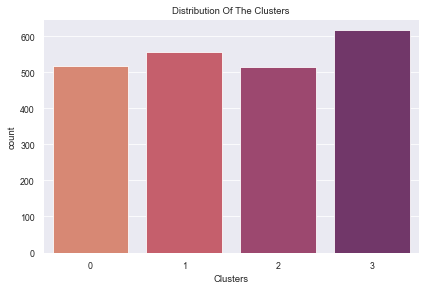

In [202]:
pl = sns.countplot(x=df["Clusters"], palette= "flare")
pl.set_title("Distribution Of The Clusters")
plt.show()

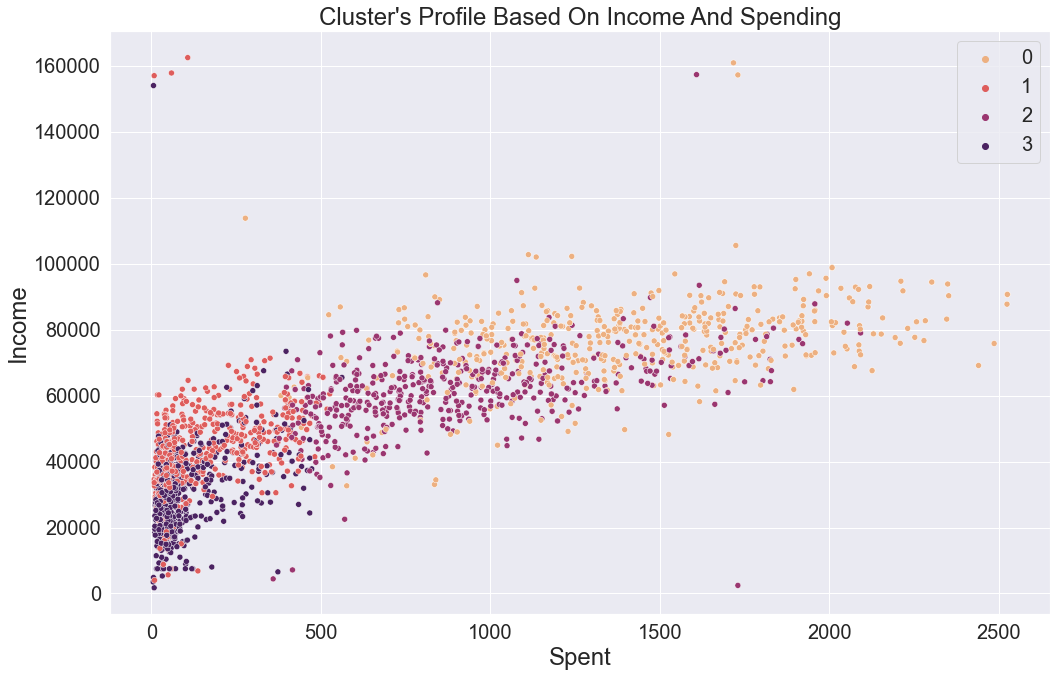

In [229]:
#This line is just to remove out an outlier value,
#Only 1 value was in the 600,000 range, which was an outlier
df = df[(df["Income"]<600000)]

plt.figure(figsize=(15,10))
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= "flare")
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.set(font_scale =2)
plt.legend(fontsize=20)
plt.show()

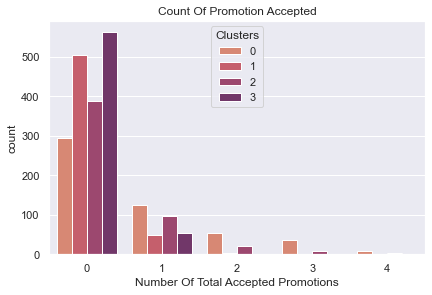

In [260]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= "flare")
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
sns.set(font_scale = 0.5)
plt.show()

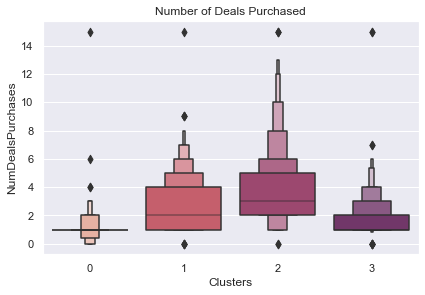

In [265]:
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= "flare")
pl.set_title("Number of Deals Purchased")
sns.set(font_scale = 0.6)
plt.show()

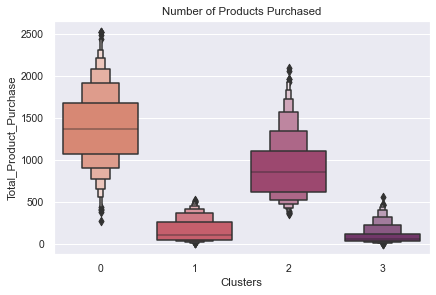

In [276]:
pl=sns.boxenplot(y=df['Total_Product_Purchase'],x=df["Clusters"], palette= "flare")
pl.set_title("Number of Products Purchased")
sns.set(font_scale = 0.5)
plt.show()